# Notebook 1: Exploratory Data Analysis

In [1]:
import pandas as pd
from src.utils import flatmap
from src.text_utils import remove_middle_names

#### Load JSON files into DataFrames

In [2]:
train = pd.read_json('data/provided_json/data_train.json')
valid = pd.read_json('data/provided_json/data_valid.json')
test = pd.read_json('data/provided_json/data_test.json')
train.head()

,abstract,authors,day,month,tags,title,year
0,Learned feature representations and sub-phonem...,"[{'name': 'Fred Richardson'}, {'name': 'Dougla...",3,4,"[cs.CL, cs.CV, cs.LG, cs.NE, stat.ML]",A Unified Deep Neural Network for Speaker and ...,2015
1,We propose a simple neural network model to de...,"[{'name': 'Muhammad Ghifary'}, {'name': 'W. Ba...",21,9,"[cs.CV, cs.AI, cs.LG, cs.NE, stat.ML]",Domain Adaptive Neural Networks for Object Rec...,2014
2,Recent studies have demonstrated the power of ...,"[{'name': 'Lionel Pigou'}, {'name': 'Aäron van...",5,6,"[cs.CV, cs.AI, cs.LG, cs.NE, stat.ML]",Beyond Temporal Pooling: Recurrence and Tempor...,2015
3,"In this paper, we address the task of Optical ...","[{'name': 'Rakesh Achanta'}, {'name': 'Trevor ...",20,9,"[stat.ML, cs.AI, cs.CV, cs.LG, cs.NE]",Telugu OCR Framework using Deep Learning,2015
4,Recent progress in using recurrent neural netw...,"[{'name': 'Li Yao'}, {'name': 'Atousa Torabi'}...",27,2,"[stat.ML, cs.AI, cs.CL, cs.CV, cs.LG]",Describing Videos by Exploiting Temporal Struc...,2015


#### Get the publishing frequency of each author in the training dataset

In [3]:
def extract_authors(df):
    return flatmap(
        df['authors']
        .apply(lambda x: [val for d in x for val in d.values()])  # Convert dicts of names to lists
        .apply(lambda names: [remove_middle_names(name) for name in names]),  # Remove middle names
        include_count=True
    )

In [4]:
train_authors = extract_authors(train)
valid_authors = extract_authors(valid)
test_authors = extract_authors(test)

train_authors.head()

,authors,freq
0,Yoshua Bengio,88
1,Uwe Aickelin,84
2,Marcus Hutter,78
3,Chunhua Shen,75
4,Joseph Halpern,66


## Summary

In [5]:
for dataset, df, authors in zip(['train', 'valid', 'test'], [train, valid, test], [train_authors, valid_authors, test_authors]):
    print(f"The '{dataset}' dataset contains {len(df)} documents with {len(authors)} unique authors.")

The 'train' dataset contains 19306 documents with 27387 unique authors.
The 'valid' dataset contains 2000 documents with 6297 unique authors.
The 'test' dataset contains 2000 documents with 6223 unique authors.


---

# Preliminary Analysis
The following analyses were focused on the properties of the training dataset (i.e. `data_train.json`)

#### How many keys are there in the `authors` field?

In [6]:
set(val for l in train['authors'].apply(lambda l: set(k for d in l for k in d.keys())) for val in l)

{'name'}

One field exists (i.e. `name`).

#### How many authors are there for each document?

In [7]:
papers_vs_author = train['authors'].apply(len).value_counts().sort_index()
papers_vs_author = pd.DataFrame(papers_vs_author).rename({'authors': '# Papers'}, axis=1)
papers_vs_author.index.name = '# Authors'
papers_vs_author

,# Papers
# Authors,
1,3478
2,5834
3,5024
4,2901
5,1201
6,466
7,187
8,90
9,47


From above, we can see the majority of papers are written by 1 to 3 authors. For some papers, the author counts are very high. On initial inspection, all these papers were actual papers with high degrees of collaboration. (TODO) Interestingly, the 67-authors paper is actually a collection of papers.

#### What are the time spans for the dataset?

First paper in dataset was published in 1993.
Published papers go up to year 2015.



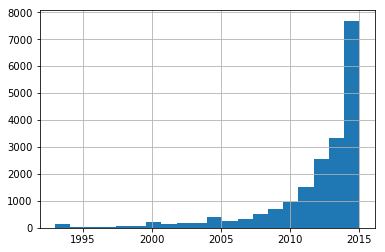

In [8]:
# Number of years with published papers and their distribution
print(f'First paper in dataset was published in {train["year"].min()}.')
print(f'Published papers go up to year {train["year"].max()}.')
print()
train['year'].hist(bins=20);